<a href="https://colab.research.google.com/github/vishenka-git/openCV/blob/master/Body_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [8]:
!mkdir body_train

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#!ls "/content/gdrive/My Drive"

In [10]:
!unzip -q "/content/gdrive/My Drive/bodies.zip" -d body_train

In [11]:
pip install opencv-python

In [12]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX

In [9]:
test_image = cv2.imread('/content/body_train/dataset/train/pos/2019-05-09_103442768087_0.jpg')

In [11]:
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

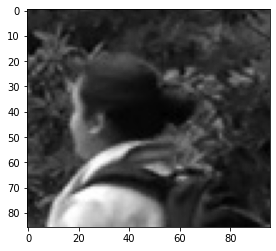

In [12]:
plt.imshow(test_image_gray, cmap='gray')

In [13]:
print(test_image_gray.shape)

(86, 96)


In [14]:
test_img = cv2.imread('/content/body_train/dataset/testing_set_people/neg/10.jpg')
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
new_img_arr = cv2.resize(test_img_gray, dsize=(80, 80))
new_img_arr

array([[  0,   0,   0, ..., 254, 254, 253],
       [  0,   0,   0, ..., 254, 254, 253],
       [  0,   0,   0, ..., 254, 254, 253],
       ...,
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254],
       [  0,   0,   0, ..., 254, 254, 254]], dtype=uint8)

In [16]:
import os

In [17]:
# main_dir = "/content/body_train/dataset/"
# train_dir = "/content/body_train/dataset/train"
# path = os.path.join(main_dir,train_dir)
# test_dir = "/content/body_train/dataset/testing_set_people"

In [18]:
#  for p in os.listdir(train_dir):
#    category = p.split(".")[0]
#    print(category)

pos
neg


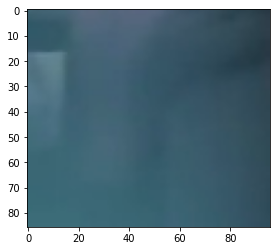

In [35]:
import glob
import numpy as np
import pprint

X_data = { 'data': None, 'target': None, 'target_name': None }

# iterate through the target directory (recursively) finding .jpg files
target_dir = "/content/body_train/dataset/train"
files = []
for f in glob.glob(target_dir + '/**/*', recursive=True):
    if f[-4:] == '.jpg':
        files.append(f)
#print('files=', files)

# create separate lists to store the data
data_list = []
target_list = []
target_name_list = []

# iterate through the files
for filename in files:
    # load input image
    image = cv2.imread(filename)
    #print('f=', filename)

    # remove the target folder name from the path
    subdir_plus_file = filename[len(target_dir)+1:]
    #print('subdir_plus_file=', subdir_plus_file)

    # extract the subdirectory
    slash_idx = subdir_plus_file.index('/')
    if (slash_idx):
        subdir = subdir_plus_file[:slash_idx]
    else:
        subdir = 'None'
    #print('subdir=', subdir)

    # append each piece of data into its respective list
    data_list.append(image)
    target_list.append(filename)
    target_name_list.append(subdir)

# convert each list into a np.array and then assemble them into a single data structure (dictionary)
X_data['data'] = np.array(data_list)
X_data['target'] = np.array(target_list)
X_data['target_name'] = np.array(target_name_list)

# print the dictionary contents
#pprint.pprint(X_data, depth=1)

# display each image along with its respective target and target_name
for idx, _ in enumerate(X_data['target']):
  image = X_data['data'][idx] 
  plt.imshow(image)
  #print('File #' , idx, '  target=', X_data['target'][idx], '  target_name=', X_data['target_name'][idx])
  cv2.waitKey(0)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#from keras.callbacks import EarlyStopping
import os

#callback = [EarlyStopping(monitor='loss', patience=0, verbose=1)]

classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Printing model

from keras.utils import plot_model
plot_model(classifier, to_file='model.png', show_shapes=True)

# Processing images

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

train_data_dir = '/content/body_train/dataset/train/'
test_data_dir = '/content/body_train/dataset/testing_set_people/'

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 subset="training",
                                                 class_mode='binary')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=train_data_dir,
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 subset="validation",
                                                 class_mode='binary')

#Test Set /no output available
test_dataset = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

classifier.fit_generator(train_dataset,
 steps_per_epoch=4000,
 epochs=5,
 validation_data=validation_dataset,
 validation_steps=1000,
 #callbacks=callback
 )

Found 13697 images belonging to 2 classes.
Found 3423 images belonging to 2 classes.
Found 1088 images belonging to 2 classes.
Epoch 1/5
4000/4000 [==============================] - 613s 153ms/step - loss: 0.1154 - accuracy: 0.9557 - val_loss: 0.1636 - val_accuracy: 0.8378
Epoch 2/5
4000/4000 [==============================] - 609s 152ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.7631 - val_accuracy: 0.8397
Epoch 3/5
4000/4000 [==============================] - 611s 153ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.6099 - val_accuracy: 0.8615
Epoch 4/5
4000/4000 [==============================] - 612s 153ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 2.1887 - val_accuracy: 0.8399
Epoch 5/5
4000/4000 [==============================] - 614s 154ms/step - loss: 8.7110e-06 - accuracy: 1.0000 - val_loss: 0.8905 - val_accuracy: 0.8377


In [43]:
model_name = 'Bodies.h5'
save_dir = '/content/body_train/'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
classifier.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/body_train/Bodies.h5 


In [188]:
# model.save_weights("Bodies.h5")

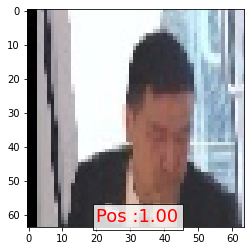

In [48]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/body_train/dataset/testing_set_people/pos/13.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Pos :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Neg :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [49]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [52]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,neg/10.jpg,0.00093,0,0
1,neg/107.jpg,0.00000,0,0
2,neg/10_ba_2.jpg,0.53371,0,1
3,neg/11.jpg,0.00002,0,0
4,neg/11_ba_2.jpg,0.00000,0,0
5,neg/12.jpg,0.00000,0,0
6,neg/12_ba_2.jpg,0.00000,0,0
7,neg/15.jpg,0.00000,0,0
8,neg/16 (2).jpg,0.00000,0,0
9,neg/16_ba_2.jpg,0.00000,0,0


In [53]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 192


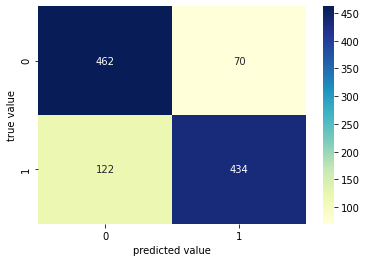

In [54]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

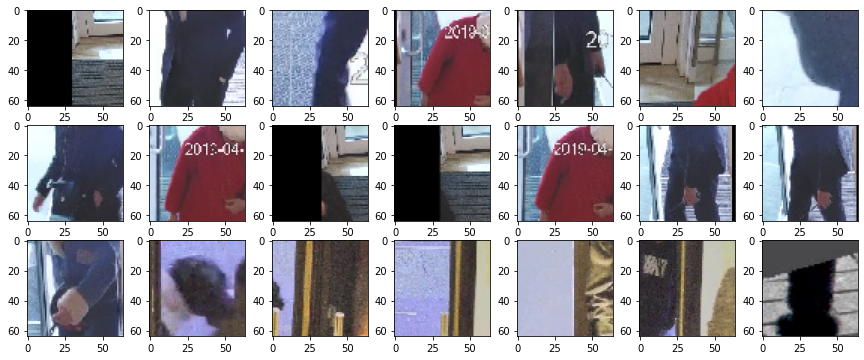

In [57]:
#Some of neg image misclassified as pos.
import matplotlib.image as mpimg

Body = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/body_train/dataset/testing_set_people/'+Body.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()

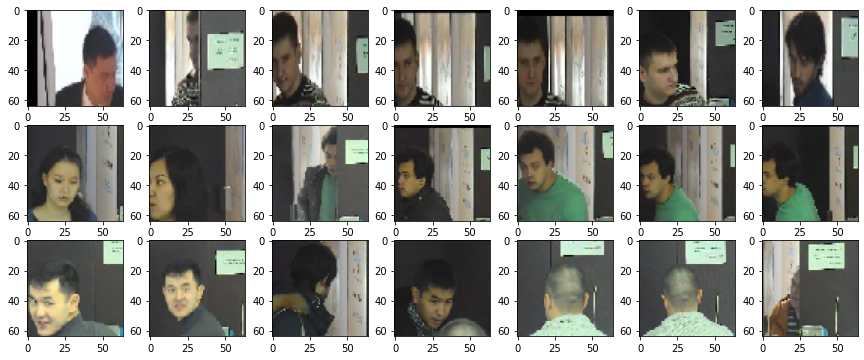

In [58]:
#Some of pos image misclassified as neg.
import matplotlib.image as mpimg

Body = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('/content/body_train/dataset/testing_set_people/'+Body.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [59]:
classifier.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

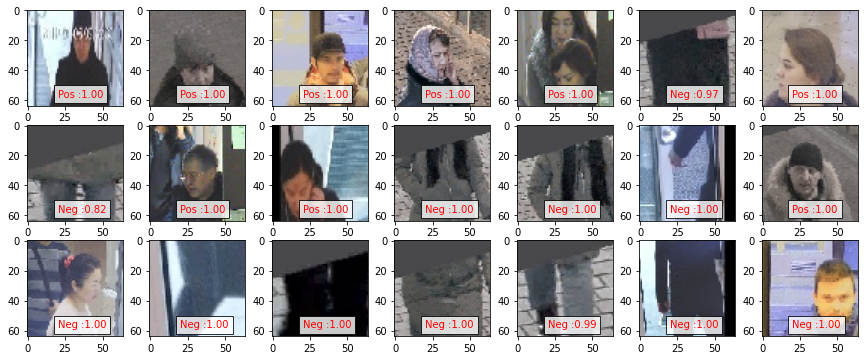

In [61]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('/content/body_train/dataset/testing_set_people/'+test_dataset.filenames[np.random.choice(range(1088))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Pos :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Neg :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [64]:
%%capture
# Model Accuracy
x1 = classifier.evaluate_generator(train_dataset)
x2 = classifier.evaluate_generator(validation_dataset)

In [65]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 100.00%     Training loss  : 0.000001
Validation Accuracy: 83.76%     Validation loss: 1.790520
